# Link to Drive, Set File Paths

In [2]:
import os
base_directory = os.getcwd() # store your base directory for easy reference
assignment_two_data = base_directory + '/Homework_Two_Data/'

In [3]:
# Load core libraries and utilities
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage import io

# Jupyter notebook "magic"
%matplotlib inline

# Helper Functions

In [4]:
# We need a tool that converts images into grayscale (i.e. all pixel values in [0, 1])
def gray_scale_convert(image):
    rescaled_image = np.zeros((image.shape[0], image.shape[1]))
    rescaled_image[:, :] = image
    rescaled_image -= np.min(rescaled_image)
    rescaled_image /= np.max(rescaled_image)
    return rescaled_image

In [5]:
# We need to be able to pass in a directory and build an image list
def file_builder(directory):
    image_list = []
    # iterate over files in
    # that directory
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename != "Readme":
                input_matrix = io.imread(os.path.join(root, filename))
                squeeze_matrix = np.squeeze(input_matrix)
                input_image = gray_scale_convert(squeeze_matrix)
                image_list.append( input_image )
    return image_list

# Problem Set

In [6]:
# Build image lists for cropped and uncropped images
cropped_directory = assignment_two_data + '/CroppedYale/'
uncropped_directory = assignment_two_data + '/yalefaces_uncropped/'

cropped_image_list = file_builder(cropped_directory)
uncropped_image_list = file_builder(uncropped_directory)

So, using the code so far, you have built lists of grayscale matrices which encode a variety of images.  Now we want to "learn" from these images using the SVD.  

**Problem 1**: Following the model below, build a matrix from the uncropped images each of whose columns is a flattened grayscale image.  

In [7]:
# Problem 1 Model
#cropped
num_crp_images = len(cropped_image_list)
crp_row, crp_col = np.shape(cropped_image_list[0])
crp_image_mat = np.zeros((crp_row*crp_col, num_crp_images), dtype=np.float64)
for cnt, image in enumerate(cropped_image_list):
    crp_image_mat[:, cnt] = image.flatten()

In [8]:
#uncropped
num_unc_images = len(uncropped_image_list)
unc_row, unc_col = np.shape(uncropped_image_list[0])
unc_image_mat = np.zeros((unc_row * unc_col, num_unc_images), dtype=np.float64)
for cnt, image in enumerate(uncropped_image_list):
    unc_image_mat[:, cnt] = image.flatten()


In [9]:
print(unc_image_mat)

[[0.49186992 0.49392713 0.50396825 ... 0.50787402 0.50980392 0.50787402]
 [0.49186992 0.49392713 0.50396825 ... 0.50787402 0.50980392 0.50787402]
 [0.49186992 0.49392713 0.50396825 ... 0.50787402 0.50980392 0.50787402]
 ...
 [0.2398374  0.24291498 0.25793651 ... 0.26377953 0.26666667 0.26377953]
 [0.2398374  0.24291498 0.25793651 ... 0.26377953 0.26666667 0.26377953]
 [0.2398374  0.24291498 0.25793651 ... 0.26377953 0.26666667 0.26377953]]


**Problem 2**: Following the discussion in lecture, take out the mean/average of the columns in each image matrix. Note, you'll need to look up how to use `np.mean()`  and `np.tile()` to make this efficient.  

In [10]:
crp_avg = np.mean(crp_image_mat, axis=1) #takes the every across each column
# Note, to turn crp_avg into a column vector use: crp_avg.reshape(-1, 1)
crp_image_mat -= np.tile(crp_avg.reshape(-1,1), (1, num_crp_images))

In [11]:
unc_avg = np.mean(unc_image_mat, axis = 1)
unc_image_mat -= np.tile(unc_avg.reshape(-1,1), (1, num_unc_images))

## what is there to add?

**Problem 3**: Using `.reshape()`, plot the average face for both the cropped and uncropped images.  

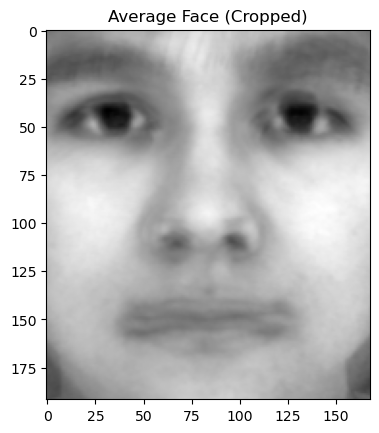

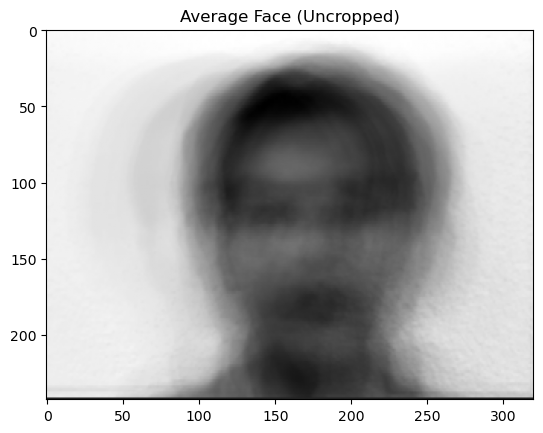

In [12]:
# Problem 3 code goes here.

crp_avg_img = crp_avg.reshape(crp_row, crp_col)
plt.figure()
plt.title("Average Face (Cropped)")
plt.imshow(crp_avg_img, cmap='gray')

unc_avg_img = unc_avg.reshape(unc_row, unc_col)
plt.figure()
plt.title("Average Face (Uncropped)")
plt.imshow(unc_avg_img, cmap='gray')
plt.show()


**Problem 4**: For both the zero-average cropped and uncropped image matrices, find the SVD of each, rescale and take log plots of the singular values, and then characterize what percentage of values are within 1/10, 1/100, and 1/1000 of the size of the largest singular value.   

## Cropped Singular Value Log Plots

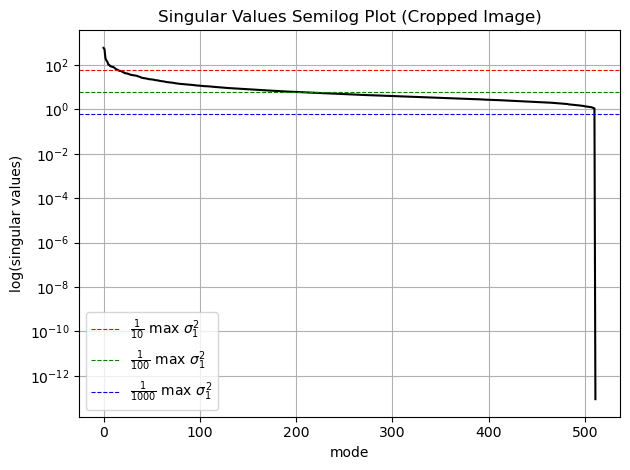

Percentage of signular values within 1/10 of max: 3.125
Percentage of singular values within 1/100 of max: 40.625
Percentage of singular values within 1/1000 of max: 99.8046875


In [63]:
u_crp, s_crp, vh_crp = np.linalg.svd(crp_image_mat, full_matrices=False)
tenth = s_crp[0] / 10
hun = s_crp[0] / 100
thous = s_crp[0] / 1000
plt.semilogy(s_crp, color = 'k')
plt.xlabel('mode')
plt.ylabel('log(singular values)')
plt.title('Singular Values Semilog Plot (Cropped Image)')
plt.axhline(y = tenth , label = r'$\frac{1}{10}\text{ max }\sigma_{1}^2$',linestyle = '--',color = 'r',linewidth=.8)
plt.axhline(y = hun, label = r'$\frac{1}{100}\text{ max }\sigma_{1}^2$',linestyle = '--',color = 'g',linewidth=.8)
plt.axhline(y = thous, label = r'$\frac{1}{1000}\text{ max }\sigma_{1}^2$',linestyle = '--',color = 'b',linewidth=.8)
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

tenth_values = np.where(s_crp >= tenth)[0]
hun_values = np.where(s_crp >= hun)[0]
thous_values = np.where(s_crp >= thous)[0]
print("Percentage of signular values within 1/10 of max:", (len(tenth_values)/len(s_crp))*100)
print("Percentage of singular values within 1/100 of max:", (len(hun_values)/len(s_crp))*100)
print("Percentage of singular values within 1/1000 of max:", (len(thous_values)/len(s_crp))*100)


## Uncropped Singular Value Log Plots

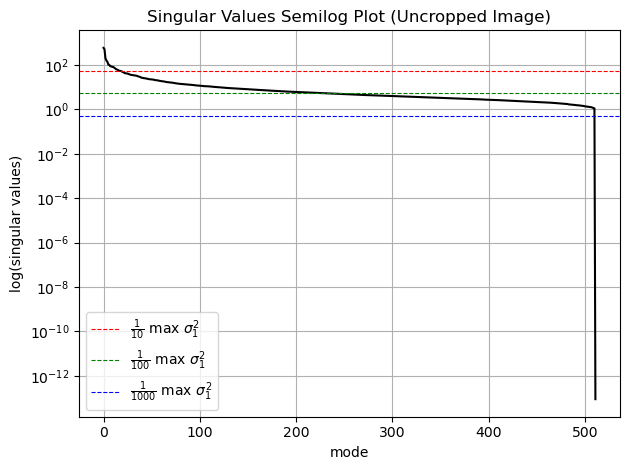

Percentage of signular values within 1/10 of max: 16.969696969696972
Percentage of singular values within 1/100 of max: 92.72727272727272
Percentage of singular values within 1/1000 of max: 93.93939393939394


In [64]:
u_unc, s_unc, vh_unc = np.linalg.svd(unc_image_mat, full_matrices=False)
tenth = s_unc[0] / 10
hun = s_unc[0] / 100
thous = s_unc[0] / 1000
plt.semilogy(s_crp, color = 'k')
plt.xlabel('mode')
plt.ylabel('log(singular values)')
plt.title('Singular Values Semilog Plot (Uncropped Image)')
plt.axhline(y = tenth , label = r'$\frac{1}{10}\text{ max }\sigma_{1}^2$',linestyle = '--',color = 'r',linewidth=.8)
plt.axhline(y = hun, label = r'$\frac{1}{100}\text{ max }\sigma_{1}^2$',linestyle = '--',color = 'g',linewidth=.8)
plt.axhline(y = thous, label = r'$\frac{1}{1000}\text{ max }\sigma_{1}^2$',linestyle = '--',color = 'b',linewidth=.8)
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

tenth_values = np.where(s_unc >= tenth)[0]
hun_values = np.where(s_unc >= hun)[0]
thous_values = np.where(s_unc >= thous)[0]
print("Percentage of signular values within 1/10 of max:", (len(tenth_values)/len(s_unc))*100)
print("Percentage of singular values within 1/100 of max:", (len(hun_values)/len(s_unc))*100)
print("Percentage of singular values within 1/1000 of max:", (len(thous_values)/len(s_unc))*100)


Now, how can we start to analyze our image collections using the SVD/PCA?  We're going to take a more naive approach than the book does to answer this.  First, plot the first three columns of `u_crp` as images in grayscale.  Explain what you are finding.  

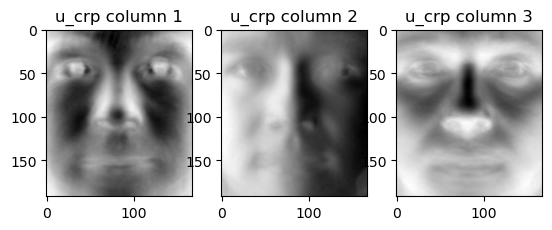

In [14]:
fig, axes = plt.subplots(1, 3)
for i in range(3):
    u_crp_col = u_crp[:, i].reshape(crp_row, crp_col)
    axes[i].imshow(u_crp_col, cmap='gray')
    axes[i].set_title(f"u_crp column {i+1}")
plt.show()


## Explain what you are finding 
The columns of $U$ point in the directions of maximum variance in the dataset. By plotting the first three columns, we can see the dominant patterns in the images. The first column captures the greatest variance across the dataset and allows us to see that it is a human face. The second column captures the next largest source of variation but with a differences in foucs such as lighting across the face. The third column continues this trend, capturing another independent variation while still maintaining facial structure.  

Next, let's see how the various projections look across all of the images.

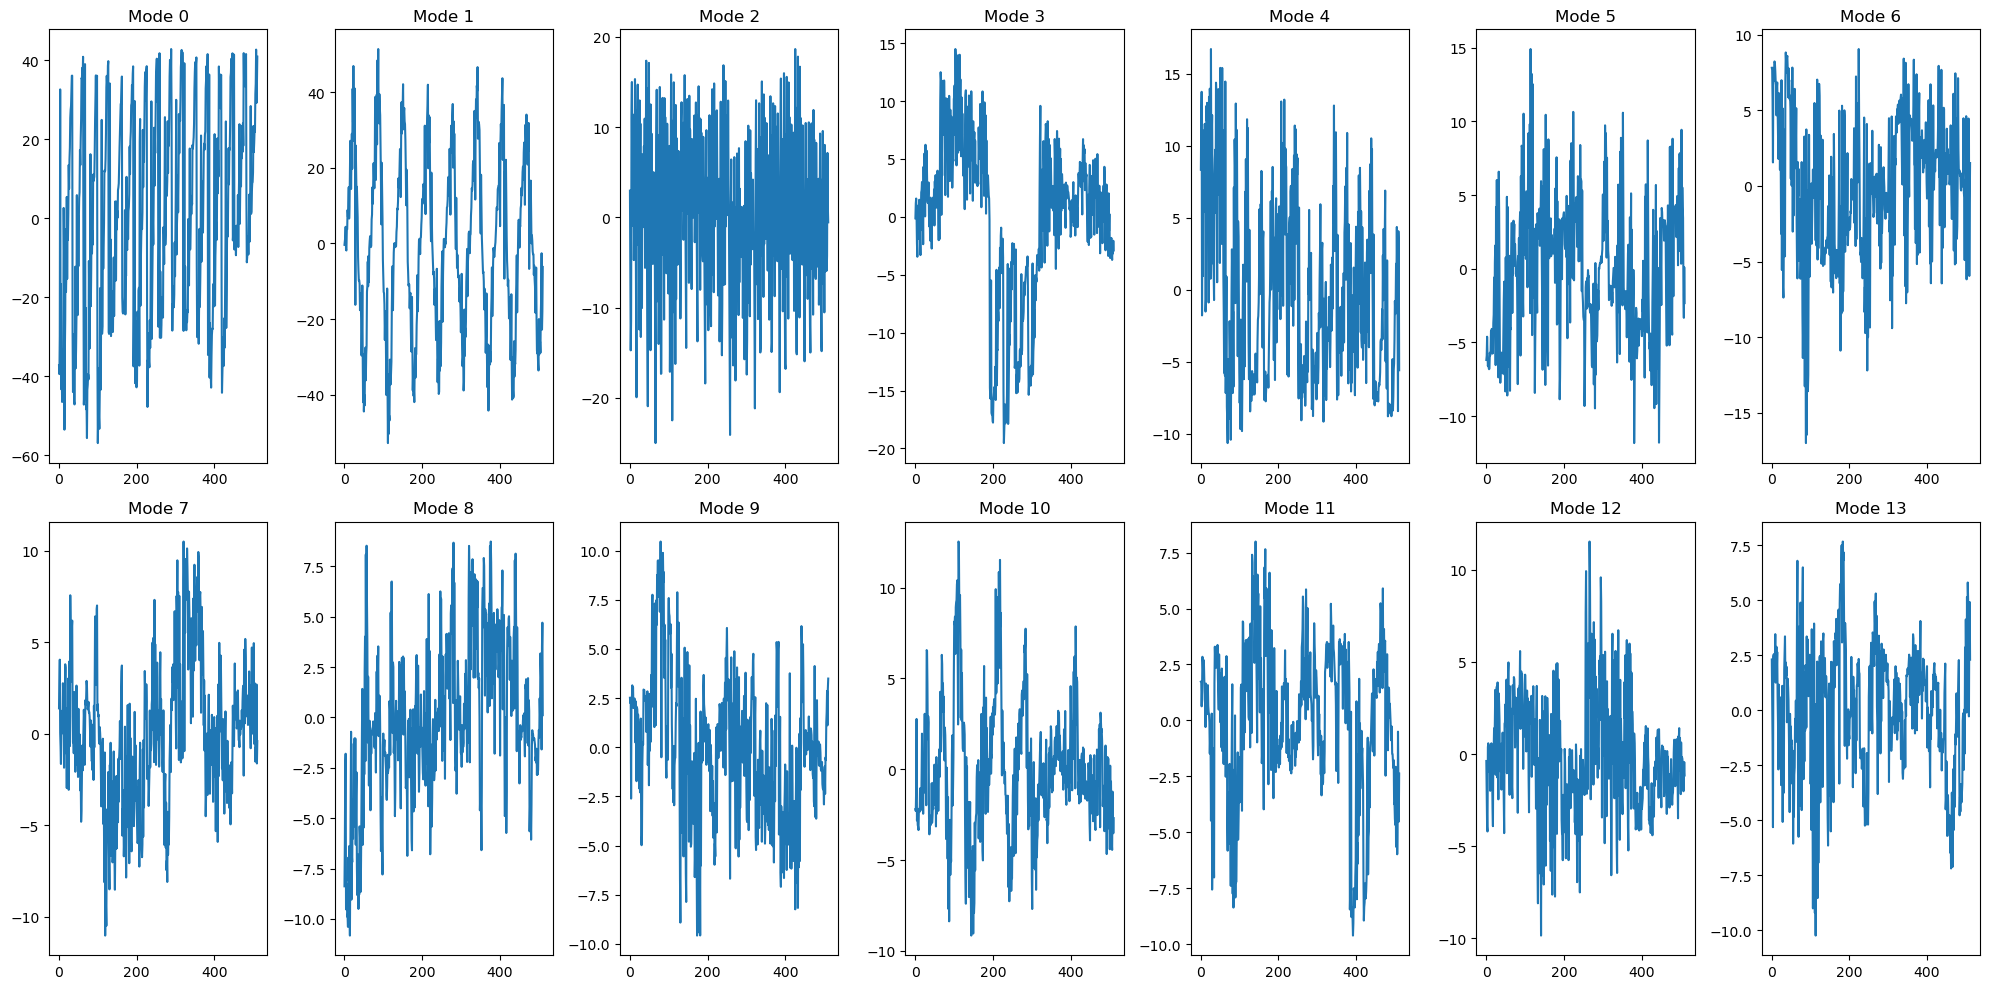

In [15]:
num_modes = 14 # why did I choose 14 here?
pca_proj_crp = u_crp[:, :num_modes].T @ crp_image_mat

fig, axes = plt.subplots(2, 7, figsize=(20, 10))
ax = axes.ravel()
for jj in range(num_modes):
    ax[jj].plot(pca_proj_crp[jj, :])
    ax[jj].set_title(f"Mode {jj}")
plt.tight_layout()
plt.show()

So since we're trying to take a stab at "clustering" our data, we might also want to look at the same plots but now as histograms.  

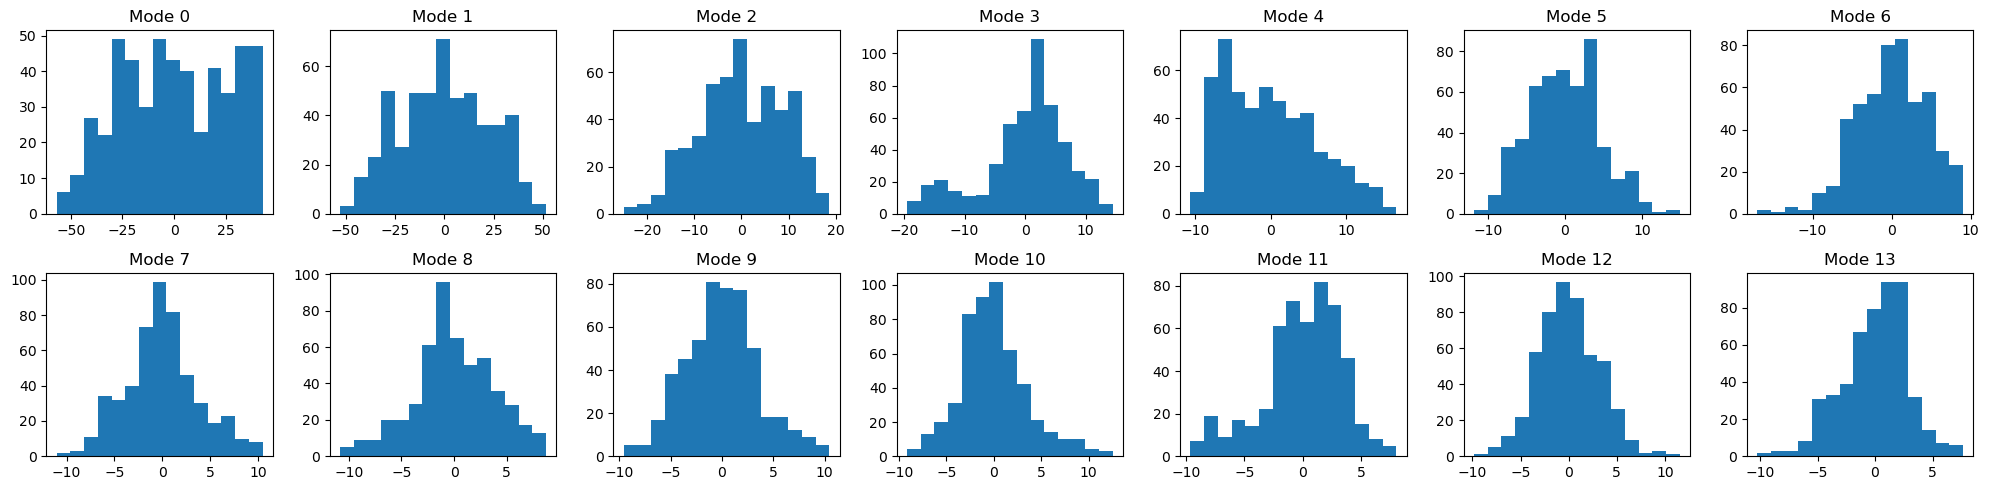

In [16]:
fig, axes = plt.subplots(2, 7, figsize=(20, 5))
ax = axes.ravel()
num_bins = 15
for jj in range(num_modes):
  ax[jj].hist(pca_proj_crp[jj, :], bins=num_bins)
  ax[jj].set_title(f"Mode {jj}")
plt.tight_layout()
plt.show()

**Problem 5** From the mode plots above, which modes do you think are the most meaningful?  To help you answer this, think about which plots might help you label images.  To do this, you need strong contrasts in the plots.  For example, how would you compare Mode 3 to Mode 13?  Which gives you more insight into underlying features of the image dataset?

The most meaningful modes are the first few, arguably up to around mode 6. After mode 6, the histograms become thinner and more narrowly peaked, and the time series plots show much less distinct variation from one mode to the next. In contrast, the early modes display clear variation and broader distributions that capture real structure in the dataset. For example, comparing modes 3 and 13, mode 3’s time series shows a clear variation pattern and its histogram is more spread out, whereas mode 13 is tightly centered around zero with little variability, suggesting it mostly captures noise.

**Problem 6** (Graduate/Extra Credit): The above is for cropped images.  Plot equivalent results for the uncropped images. 

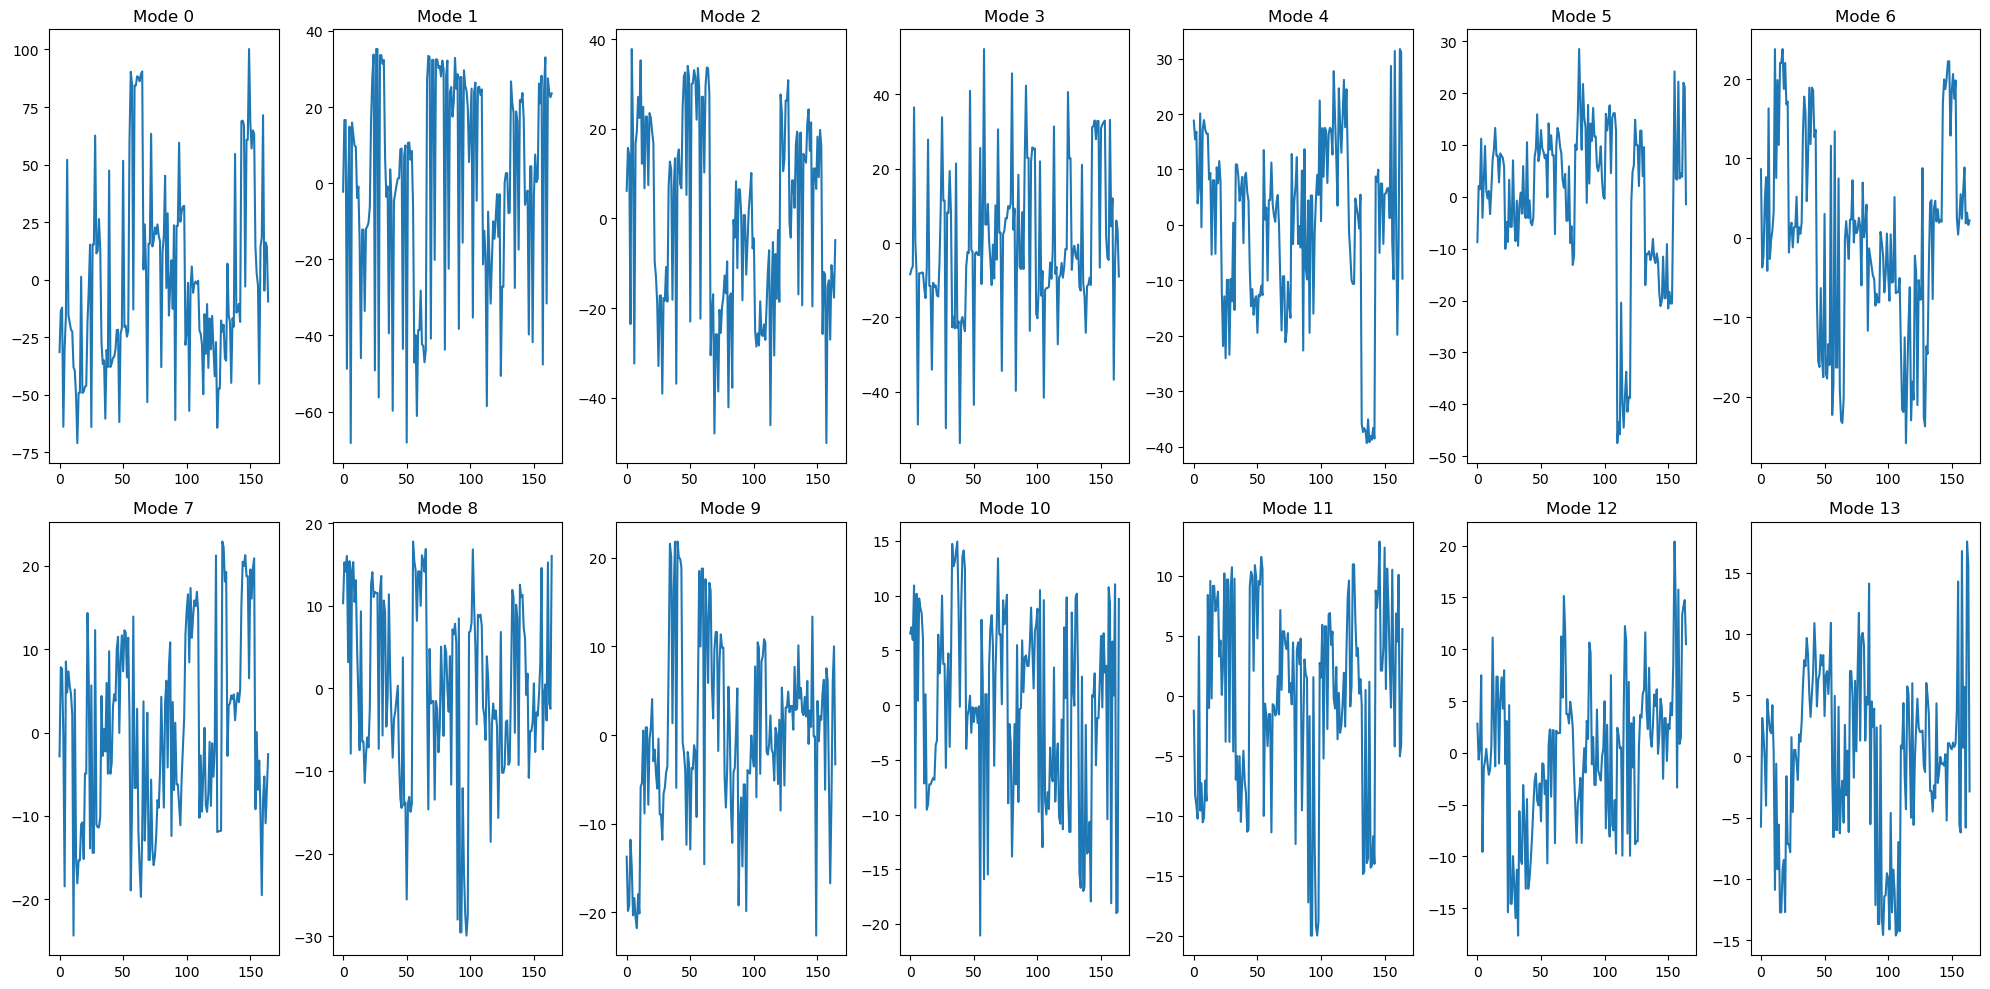

In [17]:
u_unc, s_unc, vh_unc = np.linalg.svd(unc_image_mat, full_matrices=False)
#uncropped projections
num_modes = 14 # why did I choose 14 here?
pca_proj_unc = u_unc[:, :num_modes].T @ unc_image_mat

fig, axes = plt.subplots(2, 7, figsize=(20, 10))
ax = axes.ravel()
for jj in range(num_modes):
    ax[jj].plot(pca_proj_unc[jj, :])
    ax[jj].set_title(f"Mode {jj}")
plt.tight_layout()
plt.show()

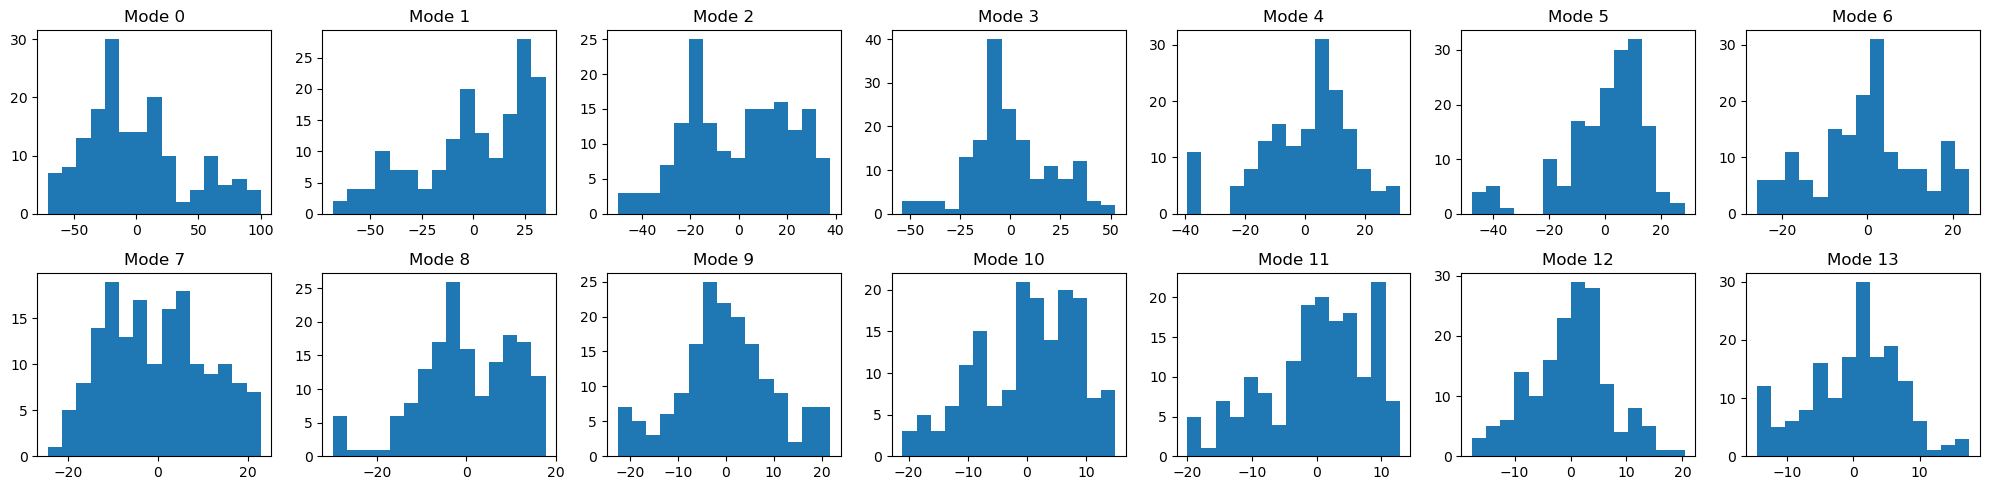

In [18]:
#uncropped histograms
fig, axes = plt.subplots(2, 7, figsize=(20, 5))
ax = axes.ravel()
num_bins = 15
for jj in range(num_modes):
  ax[jj].hist(pca_proj_unc[jj, :], bins=num_bins)
  ax[jj].set_title(f"Mode {jj}")
plt.tight_layout()
plt.show()

**Problem 7**: Now, for the cropped image set, choose the 3 most interesting modes and plot them against one another using the code below.  What else can you infer by looking at this plot?  Note, you might want to try a few different choices here.  Maybe even plot some 'bad' choices just so you have some points of comparison here.  

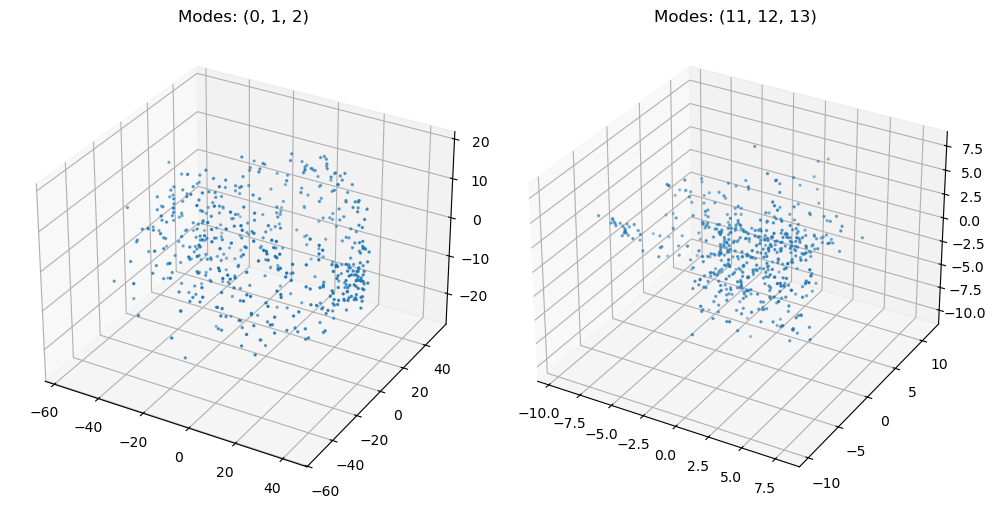

In [21]:
comb_list = [[0, 1,2 ], [11,12 ,13 ]] # add your particular choices here

fig = plt.figure(figsize=(10, 5))
for jj in range(len(comb_list)):
  x = pca_proj_crp[comb_list[jj][0], :]
  y = pca_proj_crp[comb_list[jj][1], :]
  z = pca_proj_crp[comb_list[jj][2], :]
  ax = fig.add_subplot(1, len(comb_list), jj+1, projection='3d') # you might need to adjust this depending on how many images you want to plot at once
  ax.scatter(x, y, z, s=2.)
  ax.set_title(f"Modes: ({comb_list[jj][0]}, {comb_list[jj][1]}, {comb_list[jj][2]})")

plt.tight_layout()
plt.show()

I chose to plot mode the first 3 modes and the last 3 modes (of the ones we were looking at). The first 3 modes are interesting because these will capture the directions of the greatest variance in the data since they have the largest singular values. These modes allow us to make out what the image actually see. With these modes, we would be able to actually make out what the image is. When plotted together, it makes sense that the plot looks a lot more spread out. This is good because these three dominant modes each explain something different. 
Now modes (11,12,13) have much smaller singular values compared to (1,2,3) so they capture much less variance. They capture more of the fine details that do not significantly affect our ability to interpret the image. This is why when they are plotted agaisnt each other, the structure created is a lot smaller and not as spread out. 

**Problem 8** (Graduate/Extra Credit): Repeat the above analysis for the uncropped image set.  What differences do you see relative to the cropped image set?  How might you explain that?  

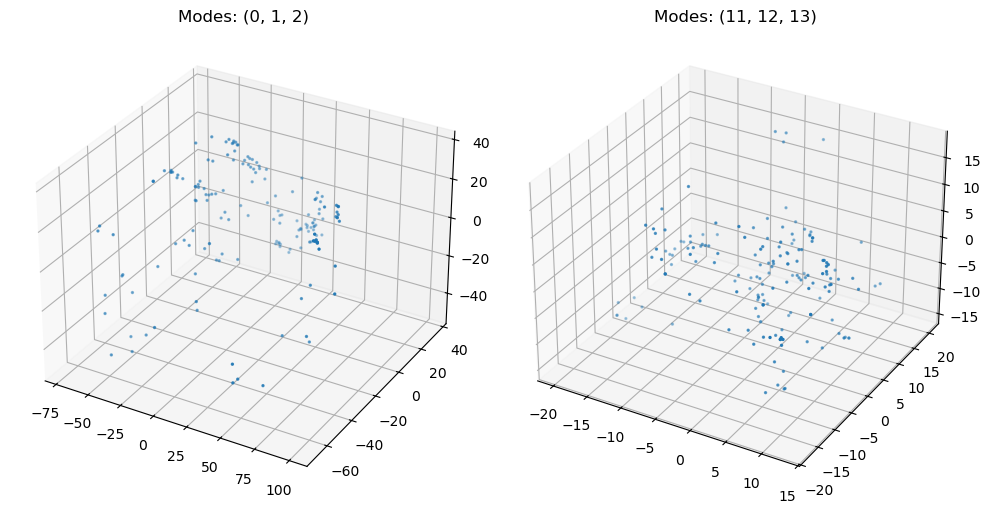

In [22]:
comb_list = [[0, 1,2 ], [11,12 ,13 ]] # add your particular choices here

fig = plt.figure(figsize=(10, 5))
for jj in range(len(comb_list)):
  x = pca_proj_unc[comb_list[jj][0], :]
  y = pca_proj_unc[comb_list[jj][1], :]
  z = pca_proj_unc[comb_list[jj][2], :]
  ax = fig.add_subplot(1, len(comb_list), jj+1, projection='3d') # you might need to adjust this depending on how many images you want to plot at once
  ax.scatter(x, y, z, s=2.)
  ax.set_title(f"Modes: ({comb_list[jj][0]}, {comb_list[jj][1]}, {comb_list[jj][2]})")

plt.tight_layout()
plt.show()

When plotting the first three modes of the uncropped images, the scatterplot looks quite different from the cropped ones. In the cropped version, the average image is a close-up of just the face, so the leading modes capture meaningful variation such as facial features, lighting, expression,etc. In the uncropped version, the average image shows a large background area, so the first modes must also account for this uninformative variance. As a result, the uncropped plots look less structured, and even modes 11–13 appear more sparse and less informative compared to the cropped version. Overall, cropping makes SVD more effective because it removes background noise and allows the dominant modes to focus on the variation that actually matters for interpreting the images.